In [149]:
import imp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
import seaborn as sns



In [150]:
data = pd.read_csv("t.csv")


In [151]:
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [152]:
data.shape

(614, 13)

In [153]:
data.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [154]:
data.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [155]:
# we remowe null rows
data = data.dropna()
data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [156]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [157]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [158]:

data.replace({"Gender":{"Male":1,"Female":0}},inplace=True)
data.replace({"Married":{"Yes":1,"No":0}},inplace=True)
data.replace({"Education":{"Graduate":1,"Not Graduate":0}},inplace=True)
data.replace({"Self_Employed":{"No":1,"Yes":0}},inplace=True)
data.replace({"Property_Area":{"Rural":1,"Urban":0,"Semiurban":2}},inplace=True)
data.replace({"Loan_Status":{"N":0,"Y":1}},inplace=True)
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,1,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1,1,0,1,0,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,1,1,0,0,1,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,1,0,0,1,1,6000,0.0,141.0,360.0,1.0,0,1
5,LP001011,1,1,2,1,0,5417,4196.0,267.0,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,1,2900,0.0,71.0,360.0,1.0,1,1
610,LP002979,1,1,3+,1,1,4106,0.0,40.0,180.0,1.0,1,1
611,LP002983,1,1,1,1,1,8072,240.0,253.0,360.0,1.0,0,1
612,LP002984,1,1,2,1,1,7583,0.0,187.0,360.0,1.0,0,1


In [159]:
data.groupby("Property_Area").mean()


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Property_Area,,,,,,,,,,
0,0.853333,0.666667,0.813333,0.880000,4988.246667,1619.358667,132.946667,335.760000,0.840000,0.653333
1,0.856115,0.618705,0.755396,0.834532,5764.697842,1576.583597,155.640288,345.496403,0.841727,0.611511
2,0.769634,0.654450,0.816754,0.869110,5368.068063,1554.324607,146.057592,344.481675,0.874346,0.780105


In [160]:
data = data.replace(to_replace="3+",value=4)
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,1,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1,1,0,1,0,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,1,1,0,0,1,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,1,0,0,1,1,6000,0.0,141.0,360.0,1.0,0,1
5,LP001011,1,1,2,1,0,5417,4196.0,267.0,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,1,2900,0.0,71.0,360.0,1.0,1,1
610,LP002979,1,1,4,1,1,4106,0.0,40.0,180.0,1.0,1,1
611,LP002983,1,1,1,1,1,8072,240.0,253.0,360.0,1.0,0,1
612,LP002984,1,1,2,1,1,7583,0.0,187.0,360.0,1.0,0,1


<AxesSubplot:xlabel='Education', ylabel='count'>

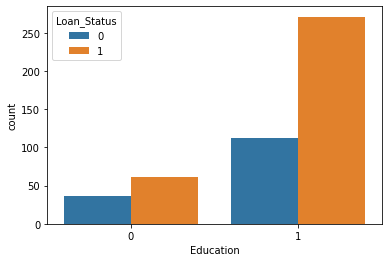

In [161]:
sns.countplot(x ="Education",hue="Loan_Status",data=data)


In [162]:
x = data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = data["Loan_Status"]




In [163]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,1,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1,1,0,1,0,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,1,1,0,0,1,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,1,0,0,1,1,6000,0.0,141.0,360.0,1.0,0,1
5,LP001011,1,1,2,1,0,5417,4196.0,267.0,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,1,2900,0.0,71.0,360.0,1.0,1,1
610,LP002979,1,1,4,1,1,4106,0.0,40.0,180.0,1.0,1,1
611,LP002983,1,1,1,1,1,8072,240.0,253.0,360.0,1.0,0,1
612,LP002984,1,1,2,1,1,7583,0.0,187.0,360.0,1.0,0,1


In [164]:
print(x)
print(y)


     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              1             4583   
2         1        1          0          1              0             3000   
3         1        1          0          0              1             2583   
4         1        0          0          1              1             6000   
5         1        1          2          1              0             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              1             2900   
610       1        1          4          1              1             4106   
611       1        1          1          1              1             8072   
612       1        1          2          1              1             7583   
613       0        0          0          1              0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [165]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [166]:
print(x_train)


     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
144       1        1          2          1              1            11757   
217       1        1          0          1              1             3727   
8         1        1          2          1              1             4006   
255       0        0          4          1              1             3083   
399       0        0          0          1              1             1500   
..      ...      ...        ...        ...            ...              ...   
386       1        0          0          0              1             2346   
28        1        0          0          0              1             1442   
91        1        1          2          1              1             6250   
18        1        1          0          0              1             4887   
214       1        1          0          1              1             3173   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [167]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)


(480, 11)
(384, 11)
(96, 11)


In [168]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(480,)
(384,)
(96,)


In [169]:
classifier = svm.SVC(kernel="linear")


In [170]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [171]:
prediction = classifier.predict(x_test)
prediction[12]


1

In [172]:
a = data.drop(columns=["LoanAmount","Loan_ID"],axis=1)
b = data["LoanAmount"]


In [173]:
x_trainl,x_testl,y_trainl,y_testl = train_test_split(a,b,test_size=0.2,random_state=2)

In [174]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_trainl,y_trainl)


LinearRegression()

In [175]:
prediction_lin = model.predict(x_testl)



0 == NO||||||
1 == YES


In [176]:
def give(num):

    print("loan prediction is :",prediction_lin[num])
    print("actual loan is-->",y_testl[num])
    print("-----------------")
    print("loan status is :",prediction[num])
    if (y_test[num]==prediction[num]):
        print("loan status prediction is true")
    else:
        print("loan status prediction is wrong")
        print(y_test[num])
        print(prediction[num])
        
    
    
    #print(y_test[num])
    


In [177]:
give(33)

loan prediction is : 119.13930012697956
actual loan is--> 114.0
-----------------
loan status is : 1
loan status prediction is true
